# 1. Outlier Detection: Moving Average and Moving Standard Deviation

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set a display option
pd.set_option('display.max_rows', 500)

In [3]:
# Generate data
np.random.seed(85)

date = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.randn(500)

date, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08',
                '2024-05-09', '2024-05-10', '2024-05-11', '2024-05-12',
                '2024-05-13', '2024-05-14'],
               dtype='datetime64[ns]', length=500, freq='D'),
 array([ 1.76850721e-01,  2.37775412e+00,  9.98732857e-01, -1.31015080e+00,
         1.80189921e-01, -1.76475402e+00, -1.44312587e+00, -1.39928556e+00,
         8.20353999e-01,  1.29529932e+00,  9.42197422e-01, -2.31932288e-01,
        -6.31397967e-01, -6.42177023e-01, -3.81671601e-01, -1.76344400e+00,
         1.61166821e+00, -8.78108389e-01, -4.98577067e-01,  9.07243402e-01,
         4.13294171e-02,  1.81547474e+00, -1.13014095e+00, -4.72347001e-01,
        -4.97490883e-01,  3.89367783e-02,  1.37619473e+00,  4.91432356e-01,
         

In [4]:
# Create a dataframe
data = pd.DataFrame({
    'Date': date,
    'Values': values
})

data

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
5,2023-01-06,-1.764754
6,2023-01-07,-1.443126
7,2023-01-08,-1.399286
8,2023-01-09,0.820354
9,2023-01-10,1.295299


In [5]:
# Calculate Moving Average and Moving Standard Deviation

# Set a window size
window_size = 7

# Calcualte
data['MovingAverage'] = data['Values'].rolling(window=window_size).mean()
data['MovingStd'] = data['Values'].rolling(window=window_size).std()

data

,Date,Values,MovingAverage,MovingStd
0,2023-01-01,0.176851,NaN,NaN
1,2023-01-02,2.377754,NaN,NaN
2,2023-01-03,0.998733,NaN,NaN
3,2023-01-04,-1.310151,NaN,NaN
4,2023-01-05,0.180190,NaN,NaN
5,2023-01-06,-1.764754,NaN,NaN
6,2023-01-07,-1.443126,-0.112072,1.502247
7,2023-01-08,-1.399286,-0.337234,1.568387
8,2023-01-09,0.820354,-0.559720,1.181904
9,2023-01-10,1.295299,-0.517353,1.250409


In [6]:
# Set Threshold
threshold_multiplier = 2

data['Threshold'] = data['MovingAverage'] + threshold_multiplier * data['MovingStd']

data

,Date,Values,MovingAverage,MovingStd,Threshold
0,2023-01-01,0.176851,NaN,NaN,NaN
1,2023-01-02,2.377754,NaN,NaN,NaN
2,2023-01-03,0.998733,NaN,NaN,NaN
3,2023-01-04,-1.310151,NaN,NaN,NaN
4,2023-01-05,0.180190,NaN,NaN,NaN
5,2023-01-06,-1.764754,NaN,NaN,NaN
6,2023-01-07,-1.443126,-0.112072,1.502247,2.892421
7,2023-01-08,-1.399286,-0.337234,1.568387,2.799540
8,2023-01-09,0.820354,-0.559720,1.181904,1.804087
9,2023-01-10,1.295299,-0.517353,1.250409,1.983464


In [7]:
# Detect Outliers
data['Outlier'] = data['Values'] > data['Threshold']

data

,Date,Values,MovingAverage,MovingStd,Threshold,Outlier
0,2023-01-01,0.176851,NaN,NaN,NaN,False
1,2023-01-02,2.377754,NaN,NaN,NaN,False
2,2023-01-03,0.998733,NaN,NaN,NaN,False
3,2023-01-04,-1.310151,NaN,NaN,NaN,False
4,2023-01-05,0.180190,NaN,NaN,NaN,False
5,2023-01-06,-1.764754,NaN,NaN,NaN,False
6,2023-01-07,-1.443126,-0.112072,1.502247,2.892421,False
7,2023-01-08,-1.399286,-0.337234,1.568387,2.799540,False
8,2023-01-09,0.820354,-0.559720,1.181904,1.804087,False
9,2023-01-10,1.295299,-0.517353,1.250409,1.983464,False


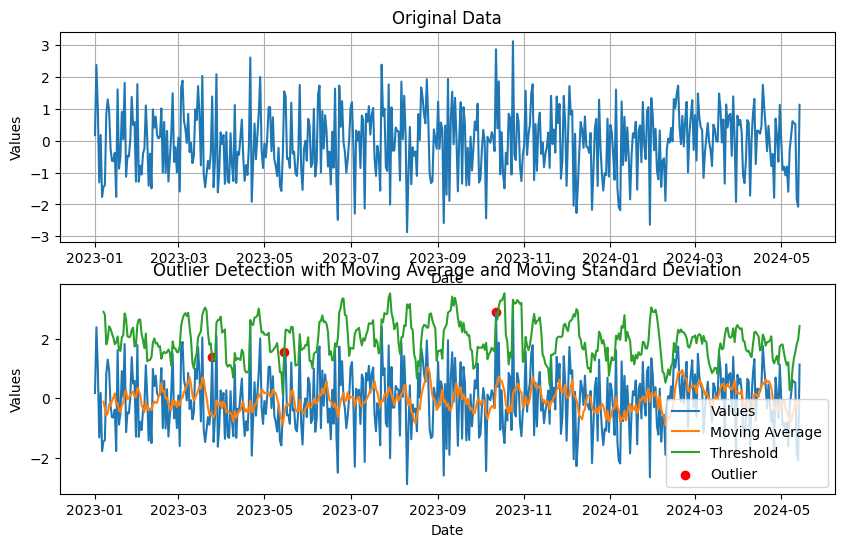

In [8]:
# Visualization

# Set a canvas
plt.figure(figsize=(10, 6))

# Graph of Original Data
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Values'])
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Original Data')
plt.grid()

# Graph of Detecting Outliers
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Values'], label='Values')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')

plt.scatter(data[data['Outlier']]['Date'],   # Get 'Date' only 'Outlier'=True
            data[data['Outlier']]['Values'],  # Get 'Value' only 'Outlier'=True
            color='red', 
            label='Outlier')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')
plt.legend()

plt.show()

# 2. Outlier Detection: Exponential Smoothing

### Preparation

In [9]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
# Generate data
np.random.seed(85)

date = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16] + [10]*90

date, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
                '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
                '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
                '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
                '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
                '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
                '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
                '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
                '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
                '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
                '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
                '2023-02-22', '2023-02-23', '2023-02-24', '2023-

In [11]:
# Create a dataframe
data = pd.DataFrame({
    'Date': date,
    'Values': values
})

data

,Date,Values
0,2023-01-01,10
1,2023-01-02,12
2,2023-01-03,11
3,2023-01-04,15
4,2023-01-05,9
5,2023-01-06,13
6,2023-01-07,8
7,2023-01-08,14
8,2023-01-09,10
9,2023-01-10,16


### Modeling

In [12]:
# Modeling
model = ExponentialSmoothing(data['Values'], trend='add')  # trend='add': Linear trend
                                                           # trend='mul'
model_fit = model.fit()

In [13]:
# Calcualte Trend
trend = model_fit.predict(start=0, end=len(data['Values'])-1)  # len(data['Value'])-1: The entire period

trend

0     11.390967
1     11.180498
2     11.176589
3     11.081175
4     11.388085
5     11.105231
6     11.225103
7     10.855693
8     11.087882
9     10.928522
10    11.367523
11    11.213159
12    11.062834
13    10.917412
14    10.777639
15    10.644146
16    10.517457
17    10.397993
18    10.286076
19    10.181940
20    10.085732
21     9.997522
22     9.917308
23     9.845022
24     9.780539
25     9.723680
26     9.674221
27     9.631898
28     9.596410
29     9.567430
30     9.544607
31     9.527570
32     9.515935
33     9.509310
34     9.507295
35     9.509490
36     9.515497
37     9.524921
38     9.537377
39     9.552488
40     9.569892
41     9.589238
42     9.610193
43     9.632440
44     9.655681
45     9.679635
46     9.704042
47     9.728661
48     9.753273
49     9.777677
50     9.801691
51     9.825156
52     9.847928
53     9.869884
54     9.890919
55     9.910944
56     9.929886
57     9.947689
58     9.964310
59     9.979720
60     9.993902
61    10.006852
62    10

In [14]:
# Calcualte Deviation
deviation = data['Values'] - trend

deviation

0    -1.390967
1     0.819502
2    -0.176589
3     3.918825
4    -2.388085
5     1.894769
6    -3.225103
7     3.144307
8    -1.087882
9     5.071478
10   -1.367523
11   -1.213159
12   -1.062834
13   -0.917412
14   -0.777639
15   -0.644146
16   -0.517457
17   -0.397993
18   -0.286076
19   -0.181940
20   -0.085732
21    0.002478
22    0.082692
23    0.154978
24    0.219461
25    0.276320
26    0.325779
27    0.368102
28    0.403590
29    0.432570
30    0.455393
31    0.472430
32    0.484065
33    0.490690
34    0.492705
35    0.490510
36    0.484503
37    0.475079
38    0.462623
39    0.447512
40    0.430108
41    0.410762
42    0.389807
43    0.367560
44    0.344319
45    0.320365
46    0.295958
47    0.271339
48    0.246727
49    0.222323
50    0.198309
51    0.174844
52    0.152072
53    0.130116
54    0.109081
55    0.089056
56    0.070114
57    0.052311
58    0.035690
59    0.020280
60    0.006098
61   -0.006852
62   -0.018575
63   -0.029086
64   -0.038409
65   -0.046575
66   -0.05

### Detect outliers

In [15]:
# Set threshold
threshold = 2

# Set outliers
outliers = abs(deviation) > threshold

outliers

0     False
1     False
2     False
3      True
4      True
5     False
6      True
7      True
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83  

### Visualization

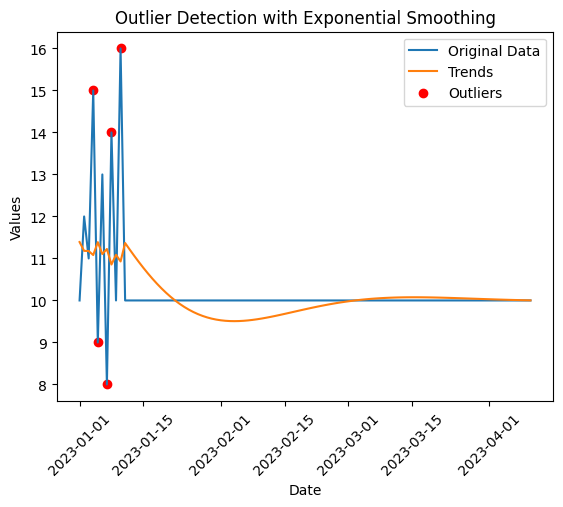

In [16]:
plt.plot(data['Date'], data['Values'], label='Original Data')
plt.plot(data['Date'], trend, label='Trends')

plt.scatter(data[outliers]['Date'], data[outliers]['Values'], color='red', label='Outliers')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Outlier Detection with Exponential Smoothing')
plt.legend()
plt.xticks(rotation=45)

plt.show()

# 3. Outlier Detection: Use Z-Score

### Preparation

In [17]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [18]:
# Generate data
np.random.seed(85)

date = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10  # Generate normally distributed data: Mean=0, Normal Std=1

date, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
                '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
                '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
                '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
                '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
                '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
                '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
                '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
                '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
                '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
                '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
                '2023-02-22', '2023-02-23', '2023-02-24', '2023-

In [19]:
# Add outliers
values[20] = 50
values[35] = -72

In [20]:
# Create a dataframe
data = pd.DataFrame({
    'Date': date,
    'Values': values
})

data

,Date,Values
0,2023-01-01,1.768507
1,2023-01-02,23.777541
2,2023-01-03,9.987329
3,2023-01-04,-13.101508
4,2023-01-05,1.801899
5,2023-01-06,-17.647540
6,2023-01-07,-14.431259
7,2023-01-08,-13.992856
8,2023-01-09,8.203540
9,2023-01-10,12.952993


### Detect Outliers


In [21]:
# Calculate Z-Score
z_scores = np.abs(stats.zscore(data['Values']))

z_scores

0     0.200412
1     1.826074
2     0.807482
3     0.897938
4     0.202878
5     1.233723
6     0.996158
7     0.963776
8     0.675725
9     1.026536
10    0.765723
11    0.101529
12    0.396588
13    0.404550
14    0.212132
15    1.232756
16    1.260217
17    0.578817
18    0.298482
19    0.739905
20    3.762954
21    1.410755
22    0.764977
23    0.279108
24    0.297680
25    0.098544
26    1.086288
27    0.432773
28    0.503296
29    0.878708
30    1.384486
31    0.882314
32    0.509115
33    0.712383
34    0.231016
35    5.248380
36    0.887543
37    0.123631
38    0.973541
39    0.229555
40    1.033799
41    0.793550
42    0.373983
43    0.627824
44    0.191355
45    0.122898
46    0.157843
47    0.818802
48    0.668499
49    0.506465
50    0.675909
51    0.294915
52    0.876197
53    0.356509
54    0.198467
55    1.171054
56    0.424263
57    0.084071
58    0.665407
59    0.141849
60    1.108799
61    1.294045
62    1.463334
63    0.534076
64    0.347176
65    0.016557
66    0.69

In [22]:
# Set Threshold
threshold = 3

In [23]:
# Calculate Outliers
outliers = z_scores > threshold

outliers

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35     True
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83  

### Detect Outliers

In [24]:
outliers_values = data[outliers]['Values']

print('Detected Outliers: \n', outliers_values)

Detected Outliers: 
 20    50.0
35   -72.0
Name: Values, dtype: float64


### Visualization

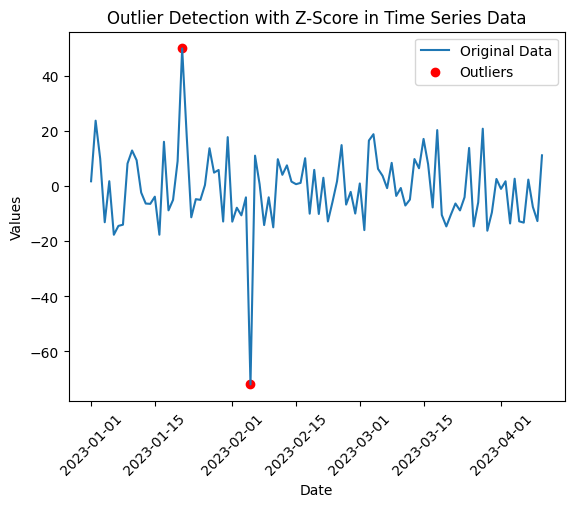

In [25]:
# Visualization
plt.plot(data['Date'], data['Values'], label='Original Data')

plt.scatter(data[outliers]['Date'], data[outliers]['Values'], color='red', label='Outliers')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.xticks(rotation=45)

plt.show()

# 4. Detect Outliers: Smoothing

- Smoothing
  1. Smoothing with Moving Average: Periodical + Long data
  2. Smoothing with Exponential Smoothing: Recent + Quick data

### Preparation

In [26]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Generate data
np.random.seed(85)

date = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 100  # Generate normally distributed data

date, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
                '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
                '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
                '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
                '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
                '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
                '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
                '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
                '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
                '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
                '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
                '2023-02-22', '2023-02-23', '2023-02-24', '2023-

In [28]:
# Create a dataframe
data = pd.DataFrame({
    'Date': date,
    'Values': values
})

data

,Date,Values
0,2023-01-01,17.685072
1,2023-01-02,237.775412
2,2023-01-03,99.873286
3,2023-01-04,-131.015080
4,2023-01-05,18.018992
5,2023-01-06,-176.475402
6,2023-01-07,-144.312587
7,2023-01-08,-139.928556
8,2023-01-09,82.035400
9,2023-01-10,129.529932


### Visualization for Original Data

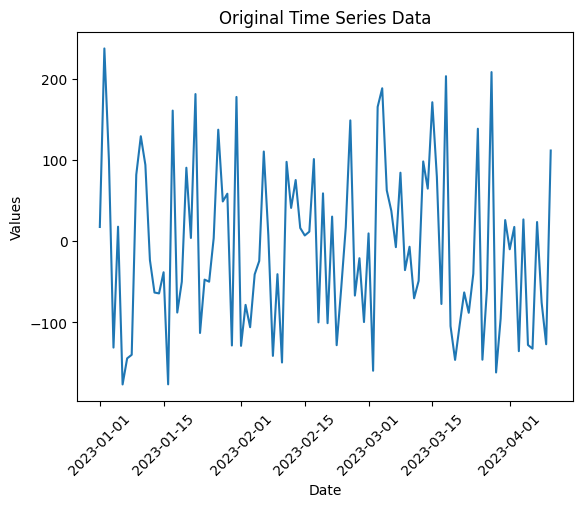

In [29]:
# Visualization
plt.plot(data['Date'], data['Values'])

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Original Time Series Data')
plt.xticks(rotation=45)

plt.show()

### Smoothing with Moving Average

In [30]:
# Set a Window Size
window_size = 7  # 7 days

In [31]:
# Calculate Moving Average
data['MovingAverage'] = data['Values'].rolling(window=window_size, 
                                               min_periods=1).mean()  # min_periods=1: Calculate mean when minimum value is 1
    
data

,Date,Values,MovingAverage
0,2023-01-01,17.685072,17.685072
1,2023-01-02,237.775412,127.730242
2,2023-01-03,99.873286,118.444590
3,2023-01-04,-131.015080,56.079673
4,2023-01-05,18.018992,48.467537
5,2023-01-06,-176.475402,10.977047
6,2023-01-07,-144.312587,-11.207187
7,2023-01-08,-139.928556,-33.723419
8,2023-01-09,82.035400,-55.971992
9,2023-01-10,129.529932,-51.735329


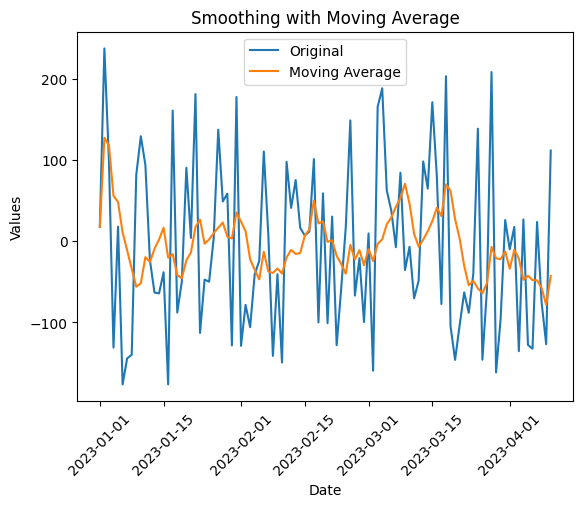

In [32]:
# Visualization
plt.plot(data['Date'], data['Values'], label='Original')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Smoothing with Moving Average')
plt.legend()
plt.xticks(rotation=45)

plt.show()

### Smoothing with Exponential Smoothing

In [33]:
# Setting the Smoothing Factor for Exponential Smoothing
alpha = 0.3

In [34]:
# Calcualte Exponential Smoothing
data['ExponentialSmoothing'] = data['Values'].ewm(alpha=alpha).mean()

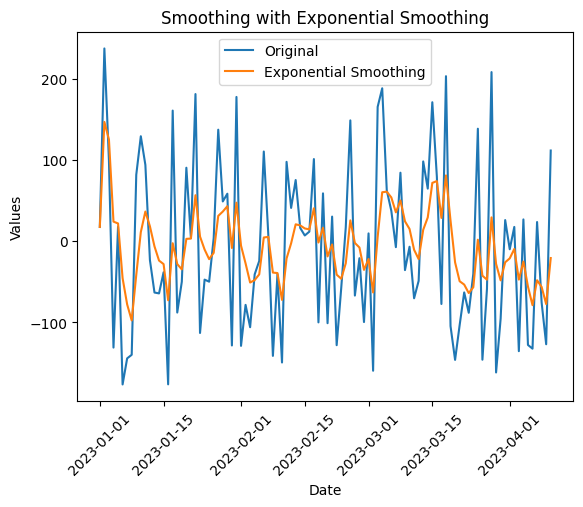

In [35]:
# Visualization
plt.plot(data['Date'], data['Values'], label='Original')
plt.plot(data['Date'], data['ExponentialSmoothing'], label='Exponential Smoothing')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Smoothing with Exponential Smoothing')
plt.legend()
plt.xticks(rotation=45)

plt.show()

# 5. Trends

### Preparation

In [36]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose  # Decompose periodical data to return Trends, Seasonality, Residuals

In [37]:
# Generate data
np.random.seed(85)

date = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [3, 15, 14, 21, 15, 32, 15, 43, 10, 32] * 10

date, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
                '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
                '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
                '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
                '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
                '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
                '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
                '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
                '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
                '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
                '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
                '2023-02-22', '2023-02-23', '2023-02-24', '2023-

In [38]:
# Create a dataframe
data = pd.DataFrame({
    'Date': date,
    'Values': values
})

data

,Date,Values
0,2023-01-01,3
1,2023-01-02,15
2,2023-01-03,14
3,2023-01-04,21
4,2023-01-05,15
5,2023-01-06,32
6,2023-01-07,15
7,2023-01-08,43
8,2023-01-09,10
9,2023-01-10,32


### Set and Decompose Periods

In [39]:
# Set a Period
period = 7   # Data repeating every 7 days

In [40]:
# Decompose the Period
result = seasonal_decompose(data['Values'], model='additive', period=period)

In [41]:
# Calculate trends
trend = result.trend

trend

0           NaN
1           NaN
2           NaN
3     16.428571
4     22.142857
5     21.428571
6     24.000000
7     21.428571
8     21.428571
9     18.857143
10    19.714286
11    15.714286
12    18.857143
13    16.428571
14    22.142857
15    21.428571
16    24.000000
17    21.428571
18    21.428571
19    18.857143
20    19.714286
21    15.714286
22    18.857143
23    16.428571
24    22.142857
25    21.428571
26    24.000000
27    21.428571
28    21.428571
29    18.857143
30    19.714286
31    15.714286
32    18.857143
33    16.428571
34    22.142857
35    21.428571
36    24.000000
37    21.428571
38    21.428571
39    18.857143
40    19.714286
41    15.714286
42    18.857143
43    16.428571
44    22.142857
45    21.428571
46    24.000000
47    21.428571
48    21.428571
49    18.857143
50    19.714286
51    15.714286
52    18.857143
53    16.428571
54    22.142857
55    21.428571
56    24.000000
57    21.428571
58    21.428571
59    18.857143
60    19.714286
61    15.714286
62    18

### Visualization

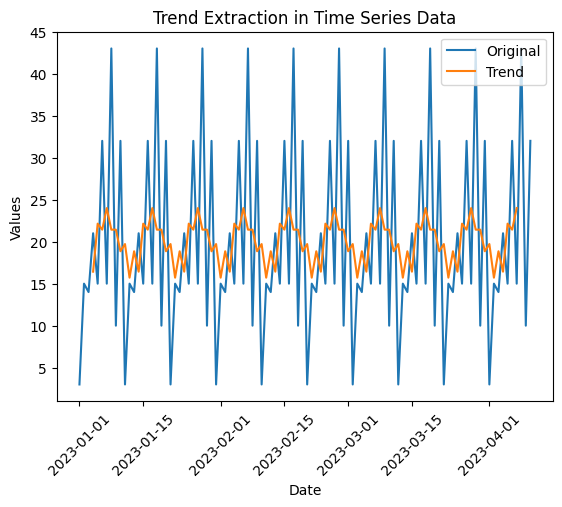

In [42]:
# Visualization
plt.plot(data['Date'], data['Values'], label='Original')
plt.plot(data['Date'], trend, label='Trend')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Trend Extraction in Time Series Data')
plt.legend()
plt.xticks(rotation=45)

plt.show()

# 6. Excercise

### Preparation

In [43]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [44]:
# Generate data
date = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 100  # Generate normally distributed data

date, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
                '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
                '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
                '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
                '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
                '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
                '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
                '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
                '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
                '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
                '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
                '2023-02-22', '2023-02-23', '2023-02-24', '2023-

In [45]:
# Add outliers
values[20] = 423
values[37] = -420
values[87] = 521

In [46]:
# Create a dataframe
data = pd.DataFrame({
    'Date': date,
    'Values': values
})

data

,Date,Values
0,2023-01-01,17.685072
1,2023-01-02,237.775412
2,2023-01-03,99.873286
3,2023-01-04,-131.015080
4,2023-01-05,18.018992
5,2023-01-06,-176.475402
6,2023-01-07,-144.312587
7,2023-01-08,-139.928556
8,2023-01-09,82.035400
9,2023-01-10,129.529932


In [47]:
# Create a backup
data_raw = data.copy()

### Detect Outliers

In [48]:
# Calculate
z_scores = np.abs(stats.zscore(data['Values']))

#z_scores

In [49]:
# Set Threshold
threshold = 3

In [98]:
# Check outliers
outliers = z_scores > threshold

#outliers

### Check and Interpolate Missing Values

In [51]:
# Change Outliers to Missing values
data.loc[outliers, 'Values'] = np.nan

In [52]:
# Interpolation missing values
data['Values_interpolated'] = data['Values'].interpolate()

data

,Date,Values,Values_interpolated
0,2023-01-01,17.685072,17.685072
1,2023-01-02,237.775412,237.775412
2,2023-01-03,99.873286,99.873286
3,2023-01-04,-131.015080,-131.015080
4,2023-01-05,18.018992,18.018992
5,2023-01-06,-176.475402,-176.475402
6,2023-01-07,-144.312587,-144.312587
7,2023-01-08,-139.928556,-139.928556
8,2023-01-09,82.035400,82.035400
9,2023-01-10,129.529932,129.529932


### Visualization

In [53]:
# Check the outliers
outliers_original = data_raw[outliers]['Values']
outliers_processed = data[outliers]['Values_interpolated']

print('Original Outliers: \n', outliers_original)
print('\nProcessed Outliers: \n', outliers_processed)

Original Outliers: 
 20    423.0
37   -420.0
87    521.0
Name: Values, dtype: float64

Processed Outliers: 
 20    136.135907
37    -15.269176
87     56.623113
Name: Values_interpolated, dtype: float64


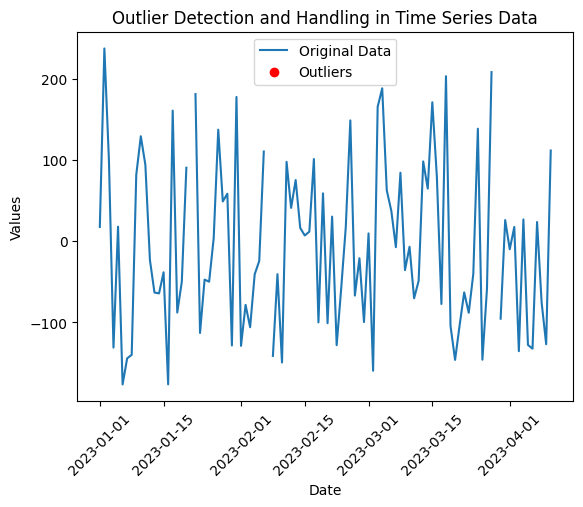

In [54]:
# Visualization
plt.plot(data['Date'], data['Values'], label='Original Data')
plt.scatter(data[outliers]['Date'], data[outliers]['Values'], color='red', label='Outliers')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Outlier Detection and Handling in Time Series Data')
plt.legend()
plt.xticks(rotation=45)

plt.show()

# 7. Normalization

## 7.1. Min-Max Normalization

### Preparation

In [55]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Generate data
np.random.seed(85)

date = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randint(0, 100, size=100)

date, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
                '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
                '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
                '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
                '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
                '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
                '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
                '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
                '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
                '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
                '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
                '2023-02-22', '2023-02-23', '2023-02-24', '2023-

In [57]:
# Creae a dataframe
data = pd.DataFrame({
    'Date': date,
    'Values': values
})

data

,Date,Values
0,2023-01-01,32
1,2023-01-02,13
2,2023-01-03,68
3,2023-01-04,51
4,2023-01-05,13
5,2023-01-06,52
6,2023-01-07,83
7,2023-01-08,37
8,2023-01-09,79
9,2023-01-10,58


### Min-Max Normalization

In [58]:
# Get Min&Max values
min_value = data['Values'].min()
max_value = data['Values'].max()

min_value, max_value

(0, 98)

In [59]:
# Calcualte normalization
data['Value_Normalized'] = (data['Values'] - min_value) / (max_value - min_value)

data

,Date,Values,Value_Normalized
0,2023-01-01,32,0.326531
1,2023-01-02,13,0.132653
2,2023-01-03,68,0.693878
3,2023-01-04,51,0.520408
4,2023-01-05,13,0.132653
5,2023-01-06,52,0.530612
6,2023-01-07,83,0.846939
7,2023-01-08,37,0.377551
8,2023-01-09,79,0.806122
9,2023-01-10,58,0.591837


# 7. Standardization

### Preparation

In [60]:
# Install libraries
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [61]:
# Import modules
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [62]:
# Generate data
np.random.seed(85)

date = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16] * 10

date, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
                '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
                '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
                '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
                '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
                '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
                '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
                '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
                '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
                '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
                '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
                '2023-02-22', '2023-02-23', '2023-02-24', '2023-

In [63]:
# Create a dataframe
data = pd.DataFrame({
    'Date': date,
    'Values': values
})

data

,Date,Values
0,2023-01-01,10
1,2023-01-02,12
2,2023-01-03,11
3,2023-01-04,15
4,2023-01-05,9
5,2023-01-06,13
6,2023-01-07,8
7,2023-01-08,14
8,2023-01-09,10
9,2023-01-10,16


### Standardization

In [64]:
# Get X
X = data['Values'].values.reshape(-1, 1)

#X

In [65]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.71374643],
       [ 0.07930516],
       [-0.31722063],
       [ 1.26888254],
       [-1.11027222],
       [ 0.47583095],
       [-1.50679801],
       [ 0.87235674],
       [-0.71374643],
       [ 1.66540833],
       [-0.71374643],
       [ 0.07930516],
       [-0.31722063],
       [ 1.26888254],
       [-1.11027222],
       [ 0.47583095],
       [-1.50679801],
       [ 0.87235674],
       [-0.71374643],
       [ 1.66540833],
       [-0.71374643],
       [ 0.07930516],
       [-0.31722063],
       [ 1.26888254],
       [-1.11027222],
       [ 0.47583095],
       [-1.50679801],
       [ 0.87235674],
       [-0.71374643],
       [ 1.66540833],
       [-0.71374643],
       [ 0.07930516],
       [-0.31722063],
       [ 1.26888254],
       [-1.11027222],
       [ 0.47583095],
       [-1.50679801],
       [ 0.87235674],
       [-0.71374643],
       [ 1.66540833],
       [-0.71374643],
       [ 0.07930516],
       [-0.31722063],
       [ 1.26888254],
       [-1.11027222],
       [ 0

In [66]:
# Add standardized X to a new column
data['Value_scaled'] = X_scaled

data

,Date,Values,Value_scaled
0,2023-01-01,10,-0.713746
1,2023-01-02,12,0.079305
2,2023-01-03,11,-0.317221
3,2023-01-04,15,1.268883
4,2023-01-05,9,-1.110272
5,2023-01-06,13,0.475831
6,2023-01-07,8,-1.506798
7,2023-01-08,14,0.872357
8,2023-01-09,10,-0.713746
9,2023-01-10,16,1.665408


# 8. Transformation

## 8.1. Log Transformation

### Preparation

In [67]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# Generate data
data = pd.DataFrame({'Values': [10, 20, 30, 40, 50]})

data

,Values
0,10
1,20
2,30
3,40
4,50


### Log Transformation 

In [69]:
# Log Transformation
data['LogValue'] = np.log(data['Values'])

data

,Values,LogValue
0,10,2.302585
1,20,2.995732
2,30,3.401197
3,40,3.688879
4,50,3.912023


### Visualization

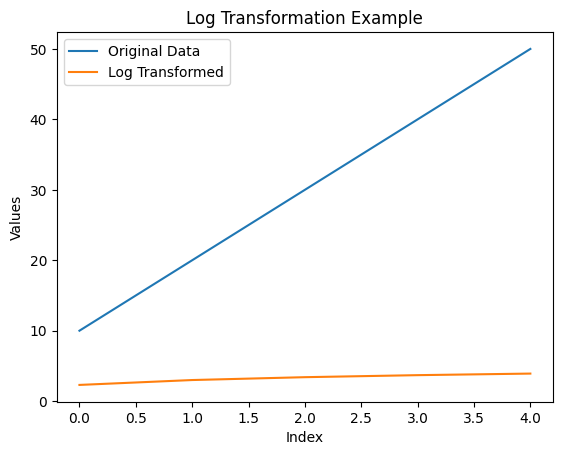

In [70]:
# Visualization
plt.plot(data['Values'], label='Original Data')
plt.plot(data['LogValue'], label='Log Transformed')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Log Transformation Example')
plt.legend()

plt.show()

## 8.2. Differences

In [71]:
# Import modules
import pandas as pd

In [72]:
# Generate data
data = pd.DataFrame({'Values': [10, 20, 40, 80, 150]})

data

,Values
0,10
1,20
2,40
3,80
4,150


In [73]:
# Difference
data['DiffValues'] = data['Values'].diff()

data

,Values,DiffValues
0,10,NaN
1,20,10.0
2,40,20.0
3,80,40.0
4,150,70.0


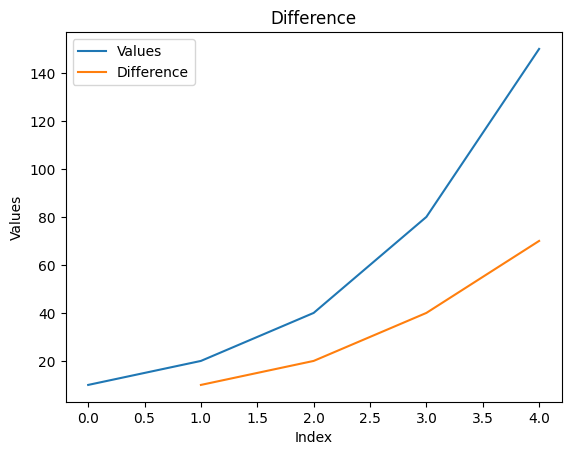

In [74]:
# Visualization
plt.plot(data['Values'], label='Values')
plt.plot(data['DiffValues'], label='Difference')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Difference')
plt.legend()

plt.show()

## 8.3. Box-Cox Transformation

In [75]:
# Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import boxcox

In [76]:
# Generate data
data = pd.DataFrame({'Values': [10, 20, 30, 40, 50]})

data

,Values
0,10
1,20
2,30
3,40
4,50


In [77]:
# Box-Cox Transformation
transformed_data, lambda_ = boxcox(data['Values'])

print('Transformed Data: ', transformed_data)
print('Lambda Value: ', lambda_)

Transformed Data:  [ 5.65138796 10.00808054 13.70844282 17.03810568 20.11674201]
Lambda Value:  0.6902965345833846


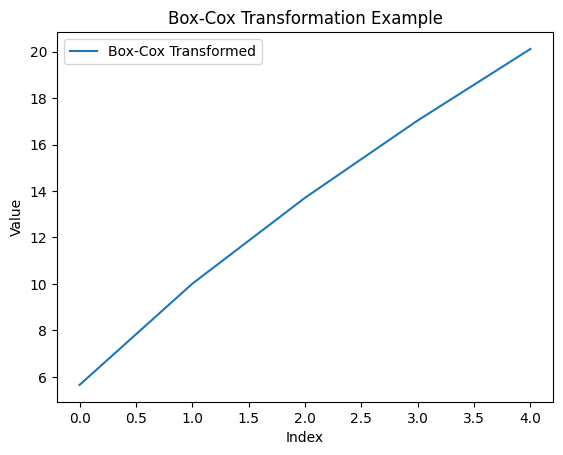

In [78]:
# Visualization
plt.plot(transformed_data, label='Box-Cox Transformed')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Box-Cox Transformation Example')
plt.legend()

plt.show()

## 8.4. Excercise - Box-Cox Transformation

In [79]:
# Import modules
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import boxcox

In [80]:
# Generate data
data = pd.DataFrame({'Values': [10, 20, 30, 40, 50]})

data

,Values
0,10
1,20
2,30
3,40
4,50


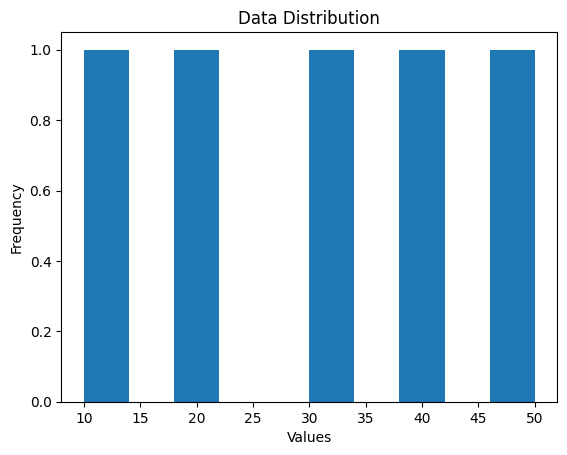

In [81]:
# Visualization
plt.hist(data['Values'])

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Data Distribution')

plt.show()

In [82]:
# Non-Normal Distribution -> Normal DistributionLog: Non-Linear Transformation(Log or Box-Cox)
data['LogValues'] = np.log(data['Values'])

data

,Values,LogValues
0,10,2.302585
1,20,2.995732
2,30,3.401197
3,40,3.688879
4,50,3.912023


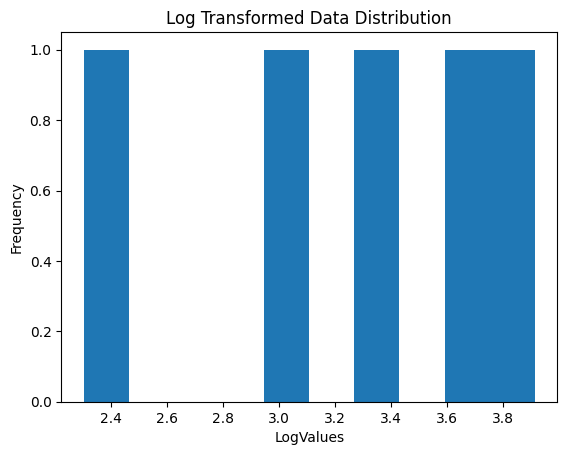

In [83]:
# Visualization: Log  Transform
plt.hist(data['LogValues'])

plt.xlabel('LogValues')
plt.ylabel('Frequency')
plt.title('Log Transformed Data Distribution')

plt.show()

In [84]:
# Box-Cox Transform
transformed_data, lambda_ = boxcox(data['Values'])

print("Transformed Data:")
print(transformed_data)
print("Lambda value:", lambda_)

Transformed Data:
[ 5.65138796 10.00808054 13.70844282 17.03810568 20.11674201]
Lambda value: 0.6902965345833846


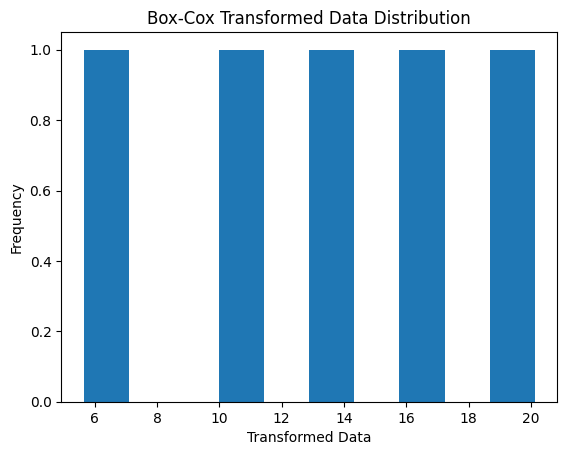

In [85]:
# Visualization: Box-Cox Transformation
plt.hist(transformed_data)

plt.xlabel('Transformed Data')
plt.ylabel('Frequency')
plt.title('Box-Cox Transformed Data Distribution')

plt.show()

# 9. Modelling

## 9.1. AR(Autoregressive) Model

In [86]:
# Import modules
import numpy as np
import pandas as pd

from statsmodels.tsa.ar_model import AutoReg  # Autoregression
from statsmodels.graphics.tsaplots import plot_acf

In [87]:
# Set Parameters
n = 100  # Number of data points
ar_params = [0.7]  # Autoregressive Parameter
ma_params = []     # Moving Average Parameter
residuals = np.random.normal(0, 1, n)   # (Mean 0, Std 1, Number of residuals n)

In [88]:
# Create AR(1) Model
data = [0]  # Initial value

for i in range(1, n):
    data.append(ar_params[0] * data[i-1] + residuals[i])

data

[0,
 2.3777541249700573,
 2.663160744532774,
 0.5540617241930981,
 0.5680331281045216,
 -1.3671308296946825,
 -2.4001174495432447,
 -3.0793677720203365,
 -1.3352034411610072,
 0.3606569109619764,
 1.194657259554162,
 0.6043277937445725,
 -0.20836851098338088,
 -0.7880349810657145,
 -0.9332960877356775,
 -2.4167512654080396,
 -0.08005767310331469,
 -0.9341487600342483,
 -1.1524811989339319,
 0.10050656303911532,
 0.11168401120027874,
 1.8936535500887952,
 0.195416534659534,
 -0.3355554267272395,
 -0.7323796820432161,
 -0.4737289990959504,
 1.0445844297123694,
 1.2226414566252701,
 1.442759908003719,
 -0.2741843989053656,
 1.5879812326675515,
 -0.1774114943143612,
 -0.9079309427507374,
 -1.6944892365034128,
 -1.5933812134965664,
 -1.357671600933538,
 0.15675315978329674,
 0.18262782794418536,
 -1.2846673148197898,
 -1.3045271086991577,
 -2.407255695971474,
 -0.7052083906789103,
 -0.0818055917306088,
 0.6982386952621059,
 0.6533561762531964,
 0.5292574864423656,
 0.48969843165937965,
 1.3

In [89]:
# Create a dataframe
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'Values': data
})

df

,Date,Values
0,2023-01-01,0.000000
1,2023-01-02,2.377754
2,2023-01-03,2.663161
3,2023-01-04,0.554062
4,2023-01-05,0.568033
5,2023-01-06,-1.367131
6,2023-01-07,-2.400117
7,2023-01-08,-3.079368
8,2023-01-09,-1.335203
9,2023-01-10,0.360657


In [90]:
# Fit AR(1) model
model = AutoReg(df['Values'], lags=1)  # lags=1: First order Aggressive model
results = model.fit()

#print(results.summary())
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 Values   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -143.804
Method:               Conditional MLE   S.D. of innovations              1.034
Date:                Wed, 31 May 2023   AIC                            293.609
Time:                        21:43:07   BIC                            301.394
Sample:                             1   HQIC                           296.759
                                  100                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0938      0.106     -0.889      0.374      -0.301       0.113
Values.L1      0.6283      0.078      8.030      0.000       0.475       0.782
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5916           +0.0000j            1.5916            0.0000
-----------------------------------------------------------------------------
"""

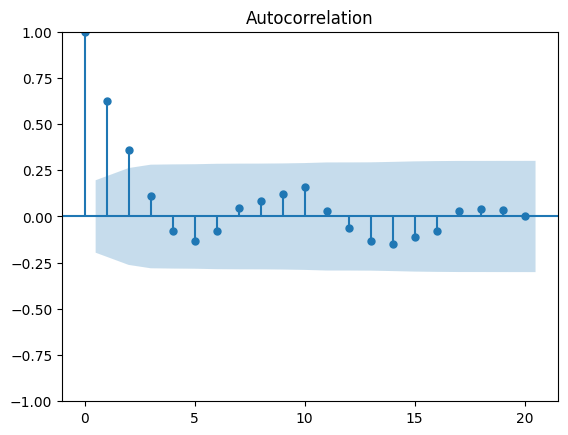

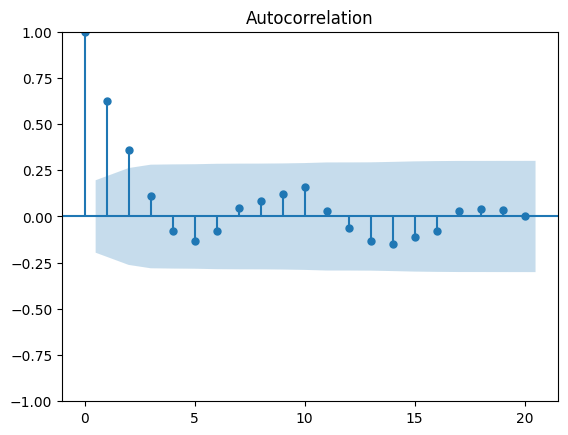

In [91]:
# Visualization: ACF Graph
plot_acf(df['Values'], lags=20)

## 9.2. Moving Average Model

In [92]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [93]:
# Set Parameters
np.random.seed(85)

n = 100
ma_params = [0.4, -0.2]  # Coefficient
residuals = np.random.normal(0, 1, n)  # (Mean 0, Std 1, Number of residuals n)

In [94]:
# Generate MA(2) Model
data = [0, 0]  # Initial value

for i in range(2, n):
    data.append(ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2] + residuals[i])

In [95]:
# Create a dataframe
df = pd.DataFrame({'Values': data})

df

,Values
0,0.000000
1,0.000000
2,1.914464
3,-1.386208
4,-0.543617
5,-1.430648
6,-2.185065
7,-1.623585
8,0.549265
9,1.903298


In [96]:
# Fit MA(2) Model
model = ARIMA(df['Values'], order=(0, 0, 2))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Values   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -144.977
Date:                Wed, 31 May 2023   AIC                            297.955
Time:                        21:43:08   BIC                            308.375
Sample:                             0   HQIC                           302.172
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1144      0.122     -0.942      0.346      -0.353       0.124
ma.L1          0.2975      0.098      3.035      0.002       0.105       0.490
ma.L2         -0.1764      0.098     -1.799      0.072      -0.369       0.016
sigma2         1.0614      0.202      5.245      0.000       0.665       1.458
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.30
Prob(Q):                              0.99   Prob(JB):                         0.12
Heteroskedasticity (H):               0.92   Skew:                             0.33
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

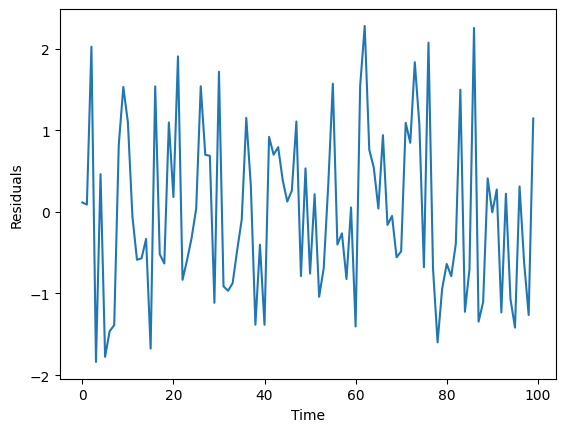

In [97]:
# Visualization
plt.plot(results.resid)

plt.xlabel('Time')
plt.ylabel('Residuals')

plt.show()